# Setting up

In [11]:
import sys

assert sys.version_info >= (3, 7)

The projects requires Python 3.7 or above.

In [12]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

It also requires Scikit-Learn $\geq$ 1.0.1.

Lets define the default font sizes to make the figures prettier.

In [13]:
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

# Diagnosis of diabetes dataset

## Load the data
The data comes from this [Kaggle website](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). The [original paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf) has detailed explanation of the metadata.

In [14]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


To gain more insight on the types of variables and to check whether there is any missing value, use `info()` method of Pandas dataframe.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Print the column names.

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

So, we have 8 predictors and 1 target feature (onset of diabetes mellitus). All the predictors are numerical attributes.

## Split the data into training and test set
Randomly split the data into training and test dataset.

In [17]:
features_name = data.columns[:-1]
target_name = data.columns[-1]
X = data.loc[:, features_name]
y = data.loc[:, target_name]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2022)

---

# Exploratory data analysis

## a. Statistical measures

In [19]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4.016287,121.835505,69.526059,20.607492,80.460912,31.997720,0.453961,33.638436
std,3.463121,32.459044,19.602538,16.056914,116.380308,7.998382,0.304183,11.792505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,15.000000,32.000000,0.361000,30.000000
75%,6.000000,143.000000,80.000000,32.000000,130.000000,36.600000,0.604000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Since the data only has numerical features, `describe()` is enough to quantify all the statistical metrics. Next, lets check the sizes of partitioned dataset.

In [20]:
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of y_train: {y_train.shape}")
print(f"The shape of X_test: {X_test.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of X_train: (614, 8)
The shape of y_train: (614,)
The shape of X_test: (154, 8)
The shape of y_test: (154,)


## b. Data visualization

In [21]:
import seaborn as sns   # This module can produce advanced visual grahics.

`Seaborn` module is helpful for:
- heatmap
- scatter plot matrix
- density plot. We will use this to visualize the model performance.

### Histogram to show the distributions of multiple continuous variables

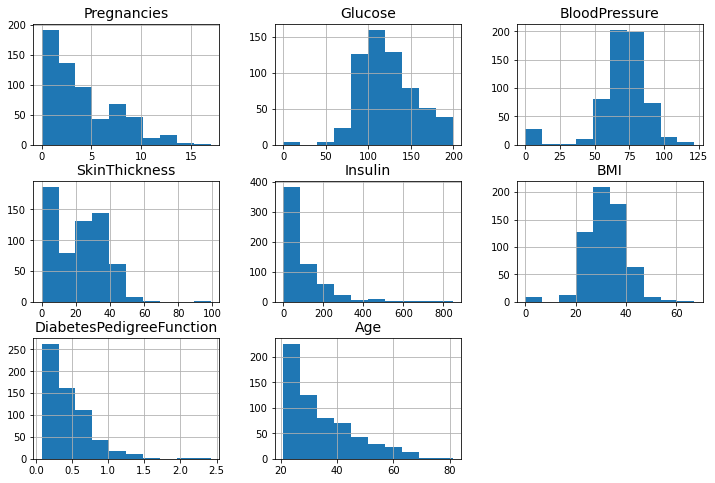

In [22]:
X_train.hist(bins = 10, figsize = (12, 8))
plt.show()

Convert the X_train from wide to long format so as to plot the grouped box plots.

In [23]:
# Concatenate X_train and y_train
data_train = pd.concat([X_train, y_train], axis = 1)

X_train_long = pd.melt(data_train, id_vars="Outcome", value_vars=X_train.columns)

X_train_long

,Outcome,variable,value
0,0,Pregnancies,8.0
1,0,Pregnancies,3.0
2,0,Pregnancies,2.0
3,0,Pregnancies,4.0
4,1,Pregnancies,10.0
...,...,...,...
4907,0,Age,21.0
4908,1,Age,46.0
4909,0,Age,21.0
4910,0,Age,23.0


In [24]:
data_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
345,8,126,88,36,108,38.5,0.349,49,0
396,3,96,56,34,115,24.7,0.944,39,0
67,2,109,92,0,0,42.7,0.845,54,0
393,4,116,72,12,87,22.1,0.463,37,0
542,10,90,85,32,0,34.9,0.825,56,1
...,...,...,...,...,...,...,...,...,...
240,1,91,64,24,0,29.2,0.192,21,0
689,1,144,82,46,180,46.1,0.335,46,1
624,2,108,64,0,0,30.8,0.158,21,0
173,1,79,60,42,48,43.5,0.678,23,0


## Grouped boxplots

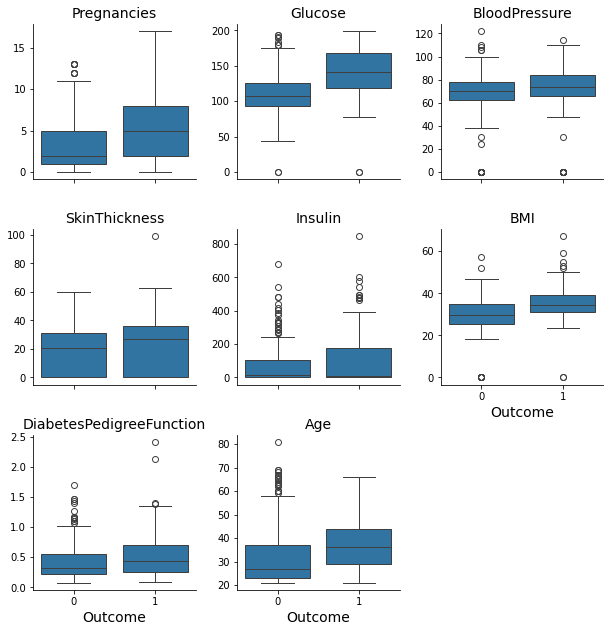

In [26]:
g = sns.FacetGrid(X_train_long, col = 'variable', col_wrap=3, sharey=False)
g.map(sns.boxplot, "Outcome", "value", order = [0, 1])
g.set_ylabels("")
g.set_titles("{col_name}")

The above boxplot series show the distribution of all the predictors for positive and negative diabetes diagnosis.

In [27]:
# Correlation matrix
corr_matrix = X_train.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.124655,0.159171,-0.073021,-0.066289,0.043241,-0.005610,0.546996
Glucose,0.124655,1.000000,0.171793,0.044578,0.328142,0.214164,0.097255,0.249810
BloodPressure,0.159171,0.171793,1.000000,0.196567,0.085515,0.272558,0.070666,0.265589
SkinThickness,-0.073021,0.044578,0.196567,1.000000,0.430891,0.399619,0.218881,-0.093684
Insulin,-0.066289,0.328142,0.085515,0.430891,1.000000,0.189003,0.162719,-0.025503
BMI,0.043241,0.214164,0.272558,0.399619,0.189003,1.000000,0.173869,0.042408
DiabetesPedigreeFunction,-0.005610,0.097255,0.070666,0.218881,0.162719,0.173869,1.000000,0.053173
Age,0.546996,0.249810,0.265589,-0.093684,-0.025503,0.042408,0.053173,1.000000


In [33]:
corr_matrix.index

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

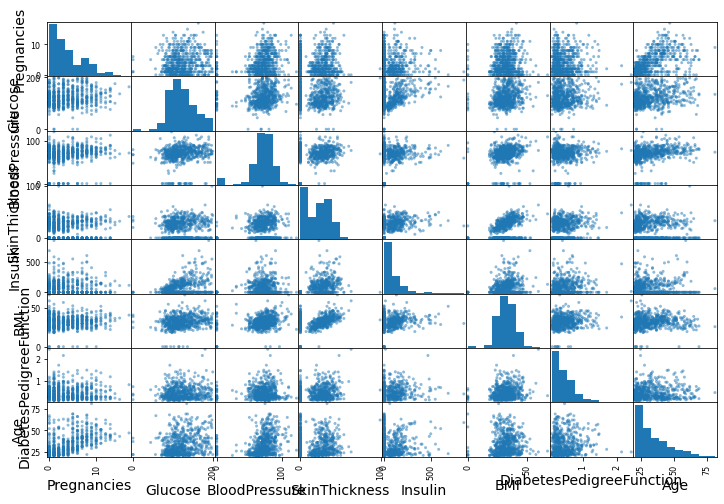

In [35]:
from pandas.plotting import scatter_matrix

# attributes = X_train.columns
scatter_matrix(X_train, figsize = (12, 8))
plt.show()

### Examine pairwise relationship closely

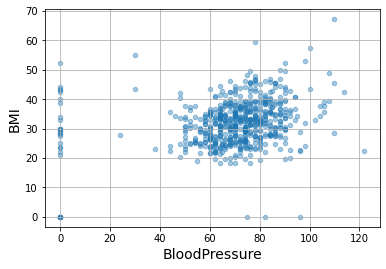

In [36]:
X_train.plot(kind = "scatter", x = "BloodPressure", y = "BMI", alpha = 0.4, grid = True)
plt.show()

### Correlation matrix as heatmap

Text(0.5, 1.0, 'Correlation matrix')

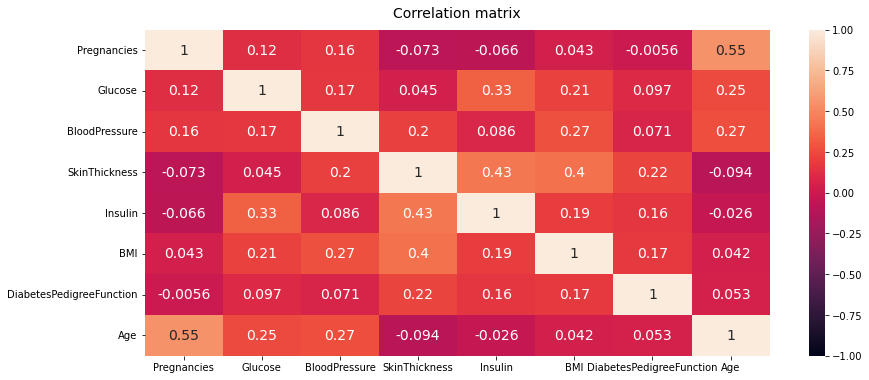

In [37]:
plt.figure(figsize = (14, 6))

heatmap = sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot=True)
heatmap.set_title('Correlation matrix', pad=12)

___

## Model training 

In [38]:
from sklearn import linear_model
# from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train_stand = scaler.fit_transform(X_train)

logr = linear_model.LogisticRegression(penalty="none", solver='newton-cg')
logr.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression(penalty='none', solver='newton-cg')

### Print out the regression model coefficients

In [40]:
print("The coefficient estimates for the LR model: ", logr.coef_)

The coefficient estimates for the LR model:  [[ 1.16536608e-01  3.38733000e-02 -1.40427406e-02  4.61179558e-03
  -9.28446817e-04  9.00436217e-02  1.18267001e+00  1.44073463e-02]]


In [41]:
data_entry = {"coeffient_values": logr.coef_[0], "coeffient_names": logr.feature_names_in_}

pd.DataFrame(data_entry)

,coeffient_values,coeffient_names
0,0.116537,Pregnancies
1,0.033873,Glucose
2,-0.014043,BloodPressure
3,0.004612,SkinThickness
4,-0.000928,Insulin
5,0.090044,BMI
6,1.182670,DiabetesPedigreeFunction
7,0.014407,Age


## Model evaluation

### Training and test accuracy

In [42]:
print("The training accuracy: ", round(100*logr.score(X_train, y_train), 2), "%")
print("The test accuracy: ", round(100*logr.score(X_test, y_test), 2), "%")

The training accuracy:  78.01 %
The test accuracy:  79.22 %


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_spar

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, logr.predict(X_test))

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([[98, 10],
       [22, 24]], dtype=int64)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


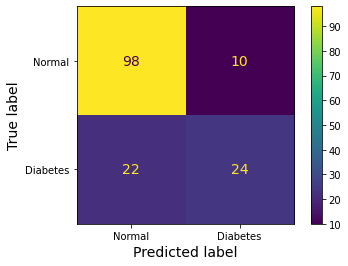

In [44]:
# display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, logr.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=class_names)

cm_display.plot()
plt.show()

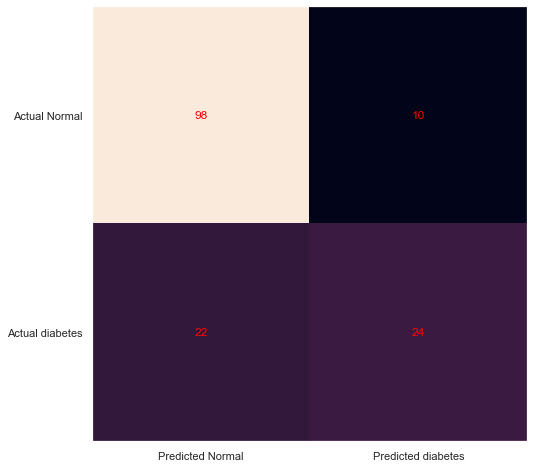

In [48]:
# Another way
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Normal', 'Predicted diabetes'))
ax.yaxis.set(ticks=(0, 1), ticklabels = ('Actual Normal', 'Actual diabetes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
        
plt.show()

### Classification report

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       108
           1       0.71      0.52      0.60        46

    accuracy                           0.79       154
   macro avg       0.76      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


## Density plot to visualize the distribution of model prediction

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\AppData\Local\Temp/ipykernel_12676/3589098993.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill

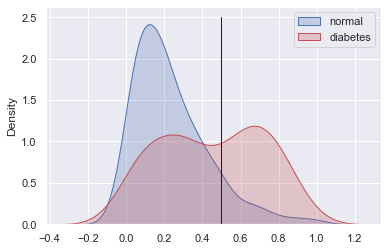

In [45]:
X_test_0 = X_test.loc[y_test==0, :]
X_test_1 = X_test.loc[y_test==1, :]

sns.set_theme(style='darkgrid')

fig = sns.kdeplot(logr.predict_proba(X_test_0)[:, 1], shade = True, color = 'b', label = 'normal')
fig = sns.kdeplot(logr.predict_proba(X_test_1)[:, 0], shade = True, color = 'r', label = 'diabetes')
plt.plot([0.5, 0.5], [0, 2.5], color = 'k', linewidth=1)

plt.legend()
plt.show()

### ROC curve

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:, 1])
AUC = auc(fpr, tpr)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


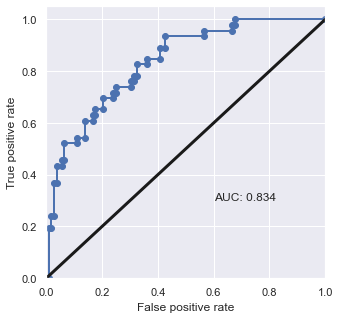

In [47]:
fig = plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, 'bo-', linewidth=2)
plt.plot([0, 1], [0, 1], 'k-', linewidth=3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.text(0.6, 0.3, f"AUC: {AUC:.3f}")
plt.ylim([0, 1.05])
plt.xlim([0, 1])
plt.show()

---

### Precision recall (extra)

In [51]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train, logr.predict_proba(X_train)[:, 1])

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


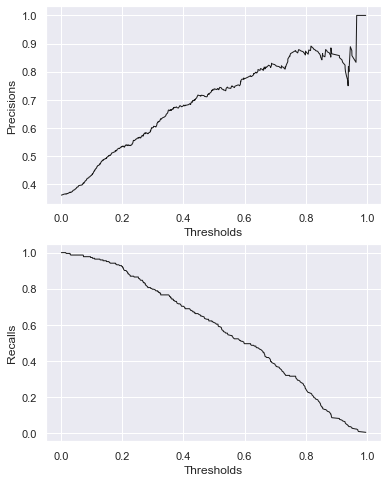

In [52]:
fig = plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.plot(thresholds, precision[:-1], 'k-', linewidth = 1)
# plt.title('Precisions')
plt.xlabel('Thresholds')
plt.ylabel('Precisions')

plt.subplot(2, 1, 2)
plt.plot(thresholds, recall[:-1], 'k-', linewidth = 1)
plt.xlabel('Thresholds')
plt.ylabel('Recalls')

plt.show()

In [53]:
pred_prob = logr.predict_proba(X_test)[:, 1]

predicted_Y_30 = [1 if i>0.3 else 0 for i in pred_prob]

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [54]:
cm = confusion_matrix(y_test, predicted_Y_30)
cm

array([[76, 32],
       [12, 34]], dtype=int64)

In [55]:
import numpy as np

acc = sum(np.diag(cm))/len(y_test)
print(f"The test accuracy: {acc:.4f}")
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
print(f"The precision: {precision:.4f}")
print(f"The recall: {recall:.4f}")

The test accuracy: 0.7143
The precision: 0.5152
The recall: 0.7391


# Acknowledgement
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.